# MicroGrad Demo

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

In [5]:
from sklearn.datasets import make_moons

In [9]:
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2-1

In [10]:
y

array([-1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
        1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
        1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1],
      dtype=int64)

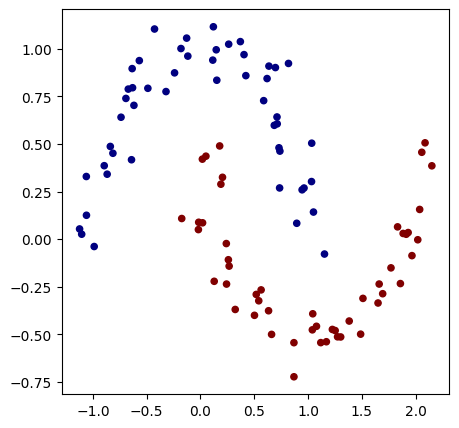

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [12]:
model = MLP(2, [16,16, 1])
print(model)
print('number of parameters: ', len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters:  337


In [30]:
xc = np.random.permutation(X.shape[0])[:10]
xb = X[xc]
# print()
# for row in xb:
#     print(row)

inputs = [list(map(Value, xrow)) for xrow in xb]
inputs

[[Value(data=0.7383154000055264, grad=0),
  Value(data=0.463035936626802, grad=0)],
 [Value(data=-0.634826982977606, grad=0),
  Value(data=0.8963738473590082, grad=0)],
 [Value(data=-0.6182769346085251, grad=0),
  Value(data=0.7034203082988373, grad=0)],
 [Value(data=0.019676848178719453, grad=0),
  Value(data=0.08645793549775535, grad=0)],
 [Value(data=1.2520130125115114, grad=0),
  Value(data=-0.47947917122382844, grad=0)],
 [Value(data=2.0373699194256134, grad=0),
  Value(data=0.1566028890245966, grad=0)],
 [Value(data=0.26648135142377993, grad=0),
  Value(data=-0.14103271842440585, grad=0)],
 [Value(data=1.9121467205523404, grad=0),
  Value(data=0.02630695384579845, grad=0)],
 [Value(data=1.7707177458426206, grad=0),
  Value(data=-0.15018557417811396, grad=0)],
 [Value(data=0.944639585393427, grad=0),
  Value(data=0.2597512004493141, grad=0)]]

In [31]:
def loss(batch_size=None):

    if batch_size is None:
        Xb, yb = X, y

    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    scores = list(map(model, inputs))

    # hinge loss 
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    
    return total_loss, sum(accuracy) / len(accuracy)


In [32]:
for k in range(100):

    total_loss, acc = loss()

    model.zero_grad()
    total_loss.backward()

    learning_rate = 1.0 - 0.9*k/100

    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f'step {k} loss {total_loss}, accuracy {acc*100}%')

step 0 loss Value(data=0.9219220440708354, grad=1), accuracy 50.0%
step 1 loss Value(data=1.469622783975524, grad=1), accuracy 78.0%
step 2 loss Value(data=0.7571112194478116, grad=1), accuracy 78.0%
step 3 loss Value(data=0.6573163744046036, grad=1), accuracy 84.0%
step 4 loss Value(data=0.33336913387218603, grad=1), accuracy 87.0%
step 5 loss Value(data=0.2714004476858788, grad=1), accuracy 89.0%
step 6 loss Value(data=0.24042802674353245, grad=1), accuracy 92.0%
step 7 loss Value(data=0.21625013989880484, grad=1), accuracy 94.0%
step 8 loss Value(data=0.19695115756006382, grad=1), accuracy 93.0%
step 9 loss Value(data=0.1919808579582114, grad=1), accuracy 96.0%
step 10 loss Value(data=0.1980483922021374, grad=1), accuracy 94.0%
step 11 loss Value(data=0.25000787953957526, grad=1), accuracy 93.0%
step 12 loss Value(data=0.3915204998252961, grad=1), accuracy 86.0%
step 13 loss Value(data=0.39046909949654485, grad=1), accuracy 87.0%
step 14 loss Value(data=0.2479495950572947, grad=1), 

(-1.7222875713140986, 2.027712428685901)

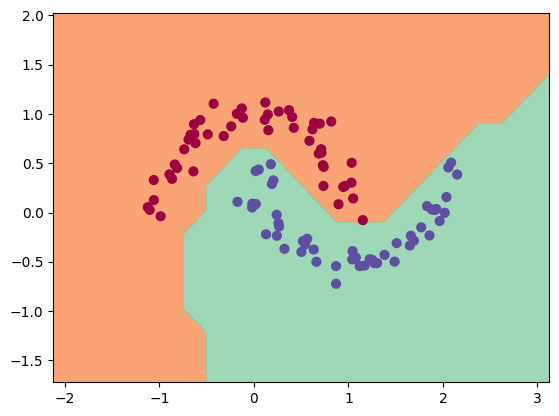

In [34]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())